In [1]:
import h5py
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt

from reproducibility.utils import data_sample, data_preprocess, set_seed, read_data
from scace import run_scace

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300 # set global dpi

2023-12-07 12:19:50.515181: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Data Preprocessing

In [2]:
####################################  Read dataset  ####################################

mat, obs, var, uns = read_data('/Users/jiayi_liu/Desktop/scAce-notes/reproducibility/data/Mouse_h.h5', sparsify=False, skip_exprs=False)
x = np.array(mat.toarray())
cell_name = np.array(obs["cell_type1"])
cell_type, y = np.unique(cell_name, return_inverse=True)

####################################  Run without sampling  ####################################

seed = 2023
set_seed(seed)

adata = sc.AnnData(x)
adata.obs['celltype'] = y

adata = data_preprocess(adata)

In [3]:
adata

AnnData object with n_obs × n_vars = 12079 × 17550
    obs: 'celltype', 'n_genes', 'n_counts', 'scale_factor'
    var: 'n_cells', 'mean', 'std'
    uns: 'log1p'

## Run scAce

In default mode, function `run_scace` would return an AnnData object with embedding and clustering result stored in `adata.obsm['scace_emb']` and `adata.obs['scace_cluster']`

In [6]:
# adata = run_scace(adata)

If return_all is True, function `run_scace` would print and return all temporate results:

- K: Final number of clusters.
- pred_all: All temporary clustering results.
- emb_all: All temporary embedding.


In [7]:
# adata, K, pred_all, emb_all, run_time = run_scace(adata, return_all=True)

If the key of grount truth cell type (i.e. `cl_type`) is also provided, ARI and NMI will also be returned.

In [4]:
adata, nmi, ari, K, pred_all, emb_all, run_time = run_scace(
    adata,
    cl_type='celltype',mp;
    return_all=True,
    pretrained_ckpt='/Users/jiayi_liu/Desktop/scAce-notes/pretraining/scace_mh.pth'
)

Pre-trained model provided, load checkpoint from file "/Users/jiayi_liu/Desktop/scAce-notes/pretraining/scace_mh.pth".
Perform initial clustering through leiden with resolution = 2
Finish initial clustering! Number of initial clusters is 44
Initial Clustering: NMI= 0.7055, ARI= 0.3269
Start training! Total epochs is 500.


Training::   0%|                                     | 0/500 [00:00<?, ?epoch/s]

Train epoch [1/500]. ZINB loss:0.2561, kld loss:18.6846, cluster loss:0.7880, total loss:1.2310


Training::   0%|                         | 1/500 [03:29<29:04:44, 209.79s/epoch]

Clustering   1: NMI= 0.7044, ARI= 0.3349, Delta=0.0892
Train epoch [2/500]. ZINB loss:0.2547, kld loss:34.9391, cluster loss:0.5511, total loss:1.1551


Training::   0%|                         | 2/500 [06:30<26:38:04, 192.54s/epoch]

Clustering   2: NMI= 0.7071, ARI= 0.3388, Delta=0.0796
Train epoch [3/500]. ZINB loss:0.2547, kld loss:38.6327, cluster loss:0.5713, total loss:1.2123


Training::   1%|▏                        | 3/500 [09:13<24:45:03, 179.28s/epoch]

Clustering   3: NMI= 0.7113, ARI= 0.3624, Delta=0.0676
Train epoch [4/500]. ZINB loss:0.2550, kld loss:40.7517, cluster loss:0.5845, total loss:1.2470


Training::   1%|▏                        | 4/500 [11:48<23:21:24, 169.53s/epoch]

Clustering   4: NMI= 0.7115, ARI= 0.3608, Delta=0.0813
Train epoch [5/500]. ZINB loss:0.2554, kld loss:42.1711, cluster loss:0.5960, total loss:1.2730


Training::   1%|▎                        | 5/500 [14:38<23:20:28, 169.75s/epoch]

Clustering   5: NMI= 0.7146, ARI= 0.3828, Delta=0.0522
Train epoch [6/500]. ZINB loss:0.2548, kld loss:43.3772, cluster loss:0.6054, total loss:1.2940


Training::   1%|▎                        | 6/500 [17:16<22:46:03, 165.92s/epoch]

Clustering   6: NMI= 0.7158, ARI= 0.3966, Delta=0.0794
Train epoch [7/500]. ZINB loss:0.2545, kld loss:44.4241, cluster loss:0.6128, total loss:1.3115


Training::   1%|▎                        | 7/500 [19:36<21:33:17, 157.40s/epoch]

Clustering   7: NMI= 0.7132, ARI= 0.3820, Delta=0.0702
Train epoch [8/500]. ZINB loss:0.2555, kld loss:45.2059, cluster loss:0.6193, total loss:1.3269


Training::   2%|▍                        | 8/500 [22:08<21:16:21, 155.65s/epoch]

Clustering   8: NMI= 0.7156, ARI= 0.3996, Delta=0.0559
Train epoch [9/500]. ZINB loss:0.2558, kld loss:45.7998, cluster loss:0.6261, total loss:1.3400


Training::   2%|▍                        | 9/500 [24:44<21:13:09, 155.58s/epoch]

Clustering   9: NMI= 0.7131, ARI= 0.3779, Delta=0.0581
Train epoch [10/500]. ZINB loss:0.2560, kld loss:46.3913, cluster loss:0.6292, total loss:1.3491


Training::   2%|▍                       | 10/500 [26:58<20:17:50, 149.12s/epoch]

Clustering   10: NMI= 0.7142, ARI= 0.3868, Delta=0.0604
Train epoch [11/500]. ZINB loss:0.2552, kld loss:46.8057, cluster loss:0.6327, total loss:1.3560


Training::   2%|▌                       | 11/500 [29:19<19:54:53, 146.61s/epoch]

Clustering   11: NMI= 0.7169, ARI= 0.4011, Delta=0.0603
Train epoch [12/500]. ZINB loss:0.2553, kld loss:47.3389, cluster loss:0.6385, total loss:1.3672


Training::   2%|▌                       | 12/500 [31:31<19:16:20, 142.17s/epoch]

Clustering   12: NMI= 0.7204, ARI= 0.4338, Delta=0.0677
Train epoch [13/500]. ZINB loss:0.2552, kld loss:47.8540, cluster loss:0.6409, total loss:1.3746


Training::   3%|▌                       | 13/500 [33:49<19:03:36, 140.90s/epoch]

Clustering   13: NMI= 0.7225, ARI= 0.4456, Delta=0.0537
Reach tolerance threshold. Perform cluster merging.
-----------------iter: 1-----------------
n_clusters: 43
count_true: 903
count: 781
-----------------iter: 2-----------------
n_clusters: 42
count_true: 861
count: 777
-----------------iter: 3-----------------
n_clusters: 41
count_true: 820
count: 765
-----------------iter: 4-----------------
n_clusters: 40
count_true: 780
count: 729
-----------------iter: 5-----------------
n_clusters: 39
count_true: 741
count: 695
-----------------iter: 6-----------------
n_clusters: 38
count_true: 703
count: 660
-----------------iter: 7-----------------
n_clusters: 37
count_true: 666
count: 624
-----------------iter: 8-----------------
n_clusters: 36
count_true: 630
count: 592
-----------------iter: 9-----------------
n_clusters: 35
count_true: 595
count: 559
-----------------iter: 10-----------------
n_clusters: 34
count_true: 561
count: 530
-----------------iter: 11-----------------
n_cluste

Training::   3%|▋                       | 14/500 [36:05<18:49:09, 139.40s/epoch]

Clustering   14: NMI= 0.7982, ARI= 0.6889, Delta=0.0493
Train epoch [15/500]. ZINB loss:0.2578, kld loss:44.8389, cluster loss:0.4756, total loss:1.1817


Training::   3%|▋                       | 15/500 [38:26<18:51:10, 139.94s/epoch]

Clustering   15: NMI= 0.7978, ARI= 0.6818, Delta=0.7960
Reach tolerance threshold. Perform cluster merging.
-----------------iter: 1-----------------
n_clusters: 13
count_true: 78
count: 65
-----------------iter: 2-----------------
n_clusters: 12
count_true: 66
count: 63
-----------------iter: 3-----------------
n_clusters: 11
count_true: 55
count: 44
-----------------iter: 4-----------------
n_clusters: 10
count_true: 45
count: 44
-----------------iter: 5-----------------
n_clusters: 9
count_true: 36
count: 36
Reach count!
Train epoch [16/500]. ZINB loss:0.2586, kld loss:39.8657, cluster loss:0.3590, total loss:1.0163


Training::   3%|▊                       | 16/500 [40:23<17:53:29, 133.08s/epoch]

Clustering   16: NMI= 0.7800, ARI= 0.7335, Delta=0.0054
Train epoch [17/500]. ZINB loss:0.2600, kld loss:40.7737, cluster loss:0.3865, total loss:1.0543


Training::   3%|▊                       | 17/500 [42:10<16:47:41, 125.18s/epoch]

Clustering   17: NMI= 0.7912, ARI= 0.7947, Delta=0.7815
Train epoch [18/500]. ZINB loss:0.2601, kld loss:41.4228, cluster loss:0.3891, total loss:1.0635


Training::   4%|▊                       | 18/500 [43:57<16:00:28, 119.56s/epoch]

Clustering   18: NMI= 0.7940, ARI= 0.7972, Delta=0.0575
Reach tolerance threshold. Perform cluster merging.
-----------------iter: 1-----------------
n_clusters: 9
count_true: 36
count: 36
Reach count!
Stop merging clusters! Continue updating several rounds.
Train epoch [19/500]. ZINB loss:0.2600, kld loss:43.3118, cluster loss:0.4104, total loss:1.1035


Training::   4%|▉                       | 19/500 [45:37<19:15:12, 144.10s/epoch]

Clustering   19: NMI= 0.7927, ARI= 0.7955, Delta=0.0031
Reach tolerance threshold. Stopping training.
Total time: 2782.892977952957 seconds


In [5]:
print("ARI = {}, NMI = {}".format(ari, nmi))

ARI = 0.79555, NMI = 0.7927


## Visualization

### Show final clustering results

In [6]:
# Use embedding `scace_emb` to perfrom U-map
sc.pp.neighbors(adata, use_rep='scace_emb')
sc.tl.umap(adata)

/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


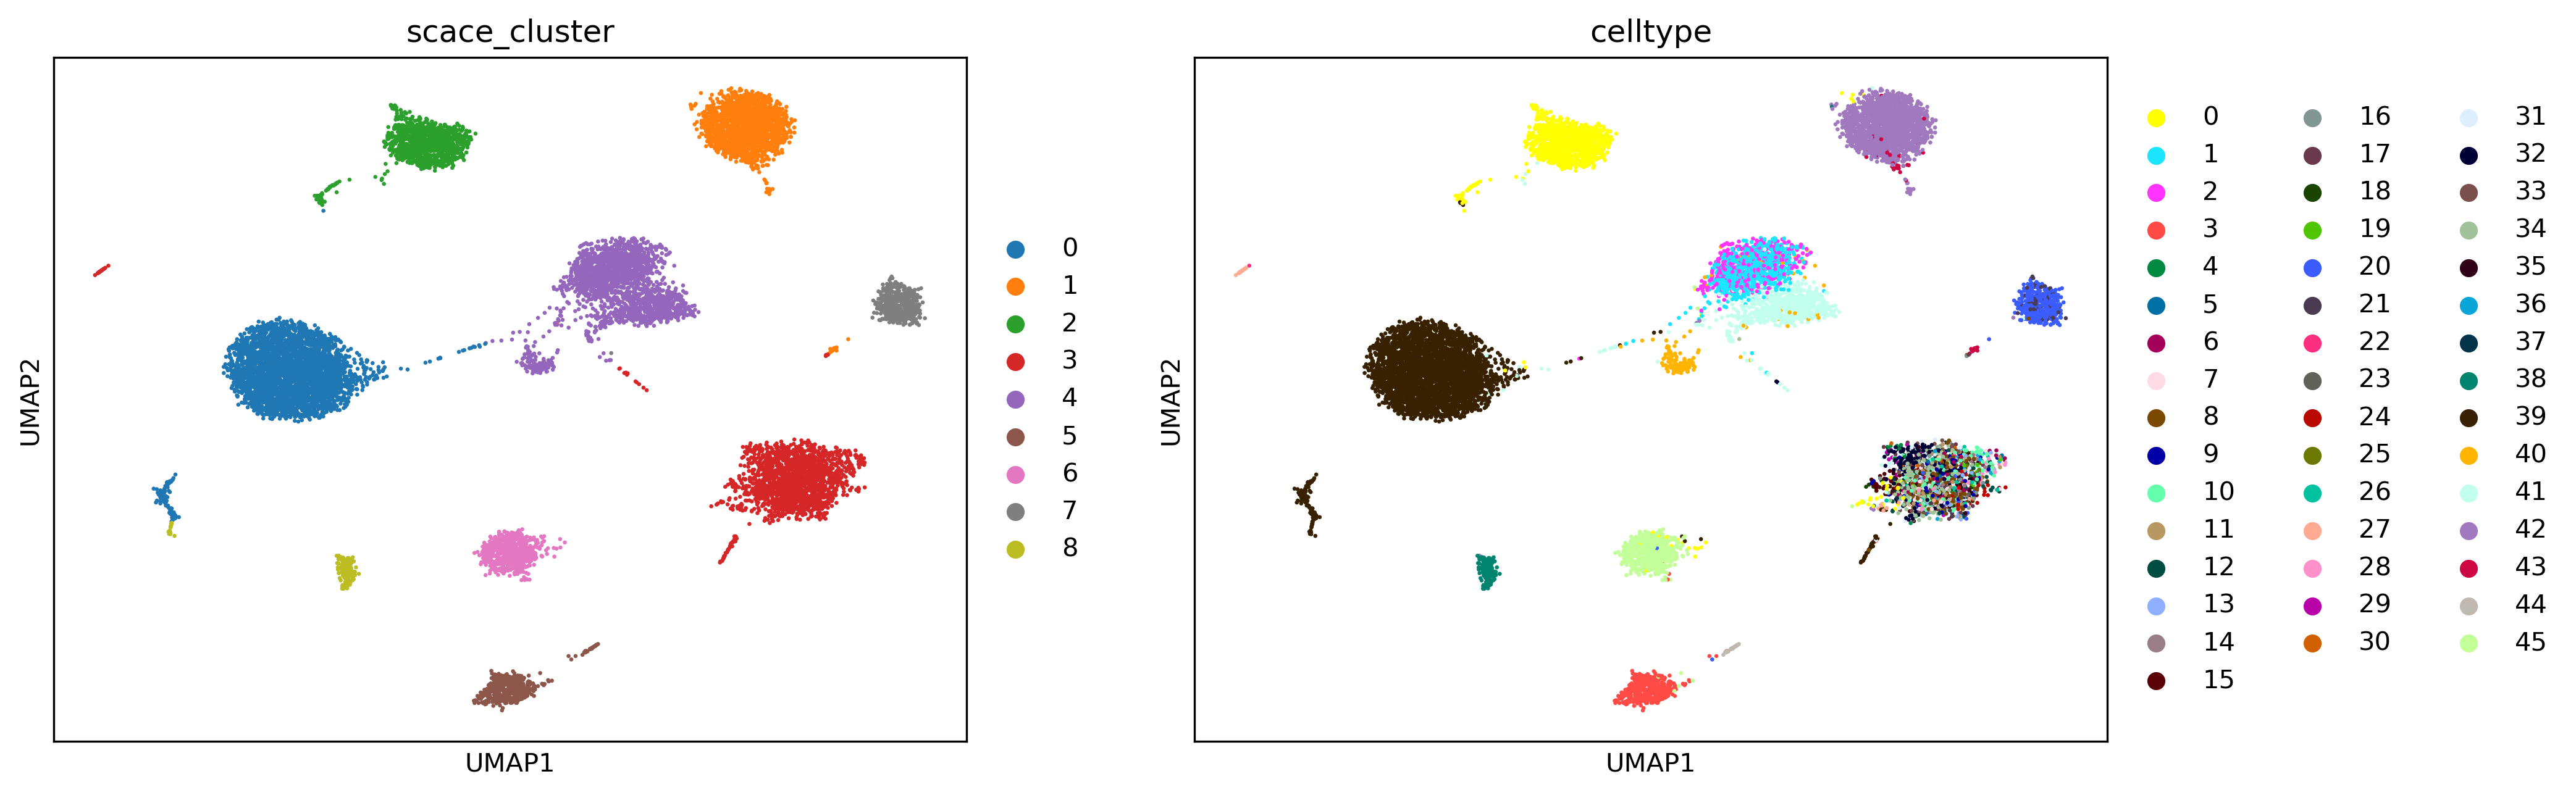

In [7]:
adata.obs['celltype'] = adata.obs['celltype'].astype(int).astype('category')
adata.obs['scace_cluster'] = adata.obs['scace_cluster'].astype(int).astype('category')
sc.pl.umap(adata, color=['scace_cluster', 'celltype'])

### Show initial clustering results

In [8]:
# emb_all[0] is the embedding after pre-training
# pred_all[0] is the initial clustering result after pre-training

adata_tmp = sc.AnnData(emb_all[0])
adata_tmp.obs['celltype'] = adata.obs['celltype']
adata_tmp.obs['scace_cluster'] = pred_all[0]
adata_tmp.obs['scace_cluster'] = adata_tmp.obs['scace_cluster'].astype(int).astype('category')

/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


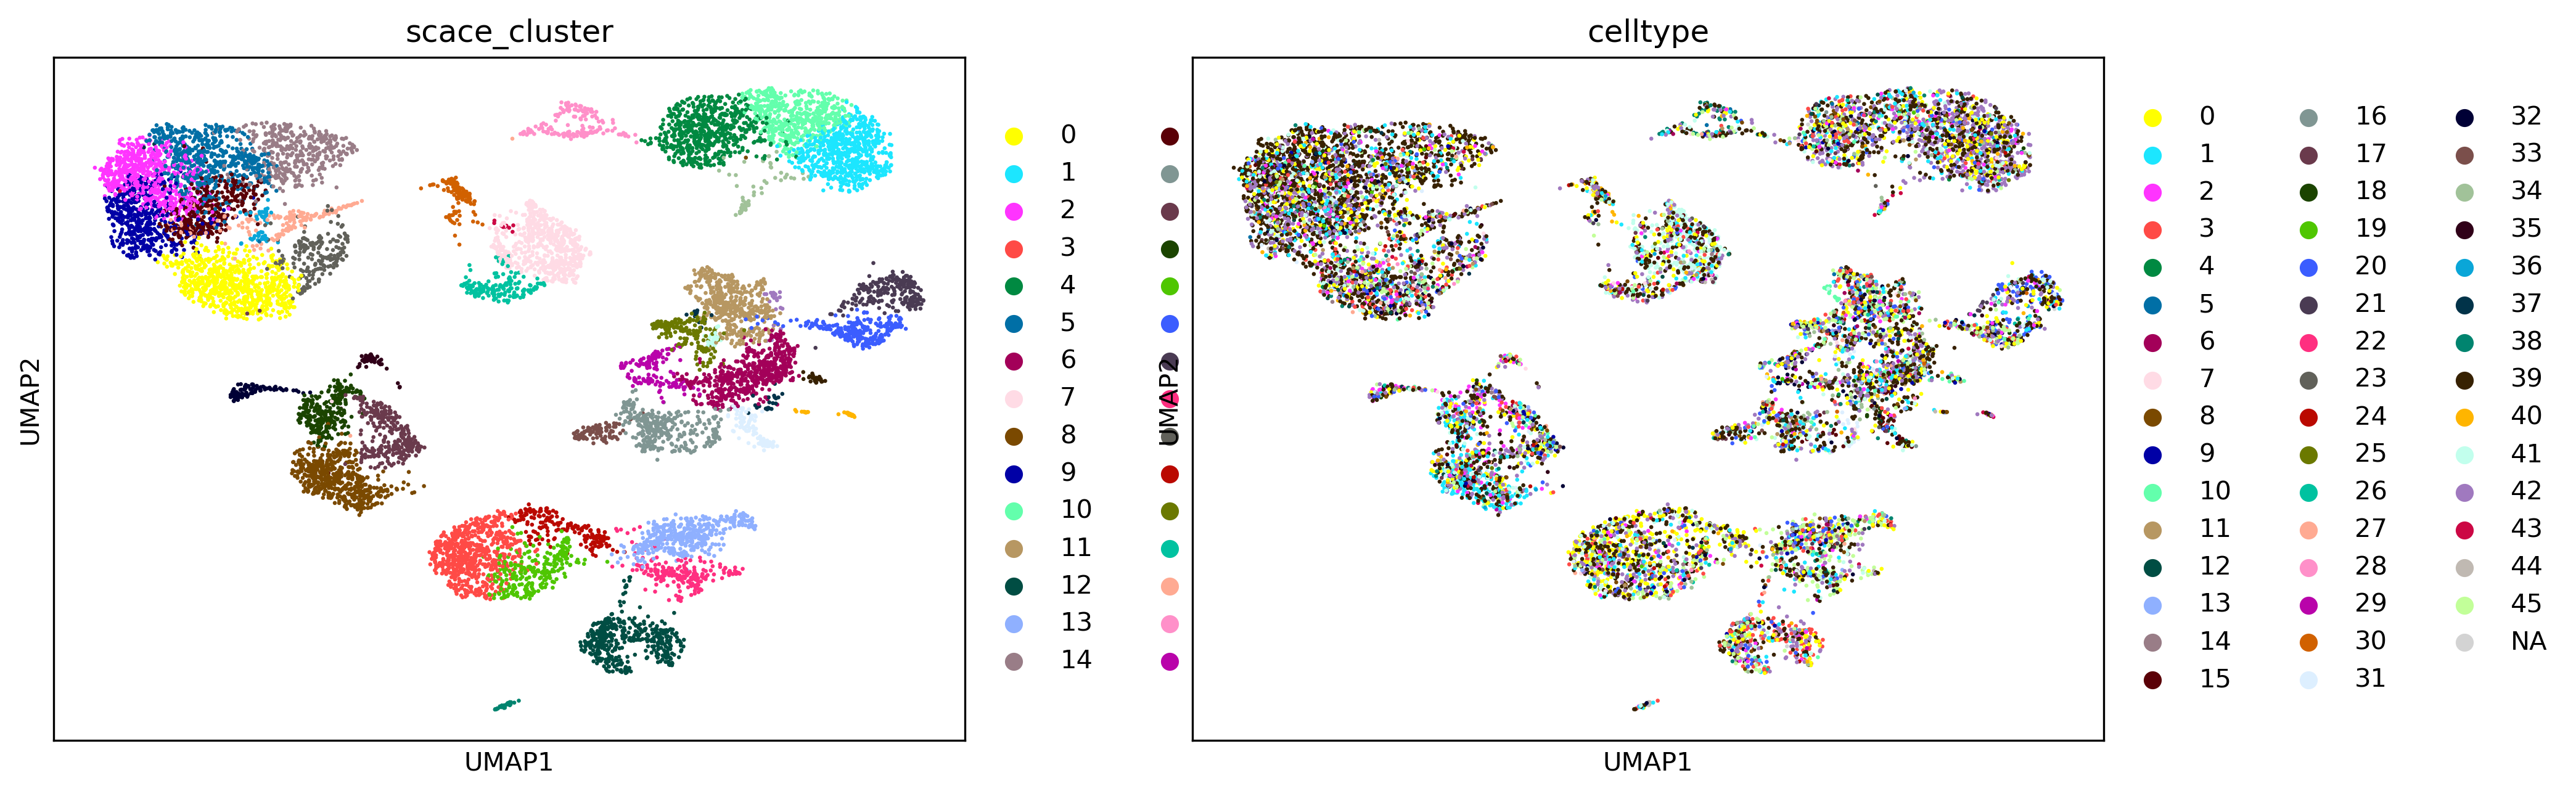

In [9]:
sc.pp.neighbors(adata_tmp)
sc.tl.umap(adata_tmp)
sc.pl.umap(adata_tmp, color=['scace_cluster', 'celltype'])

### Show clustering results before and after cluster merging

For the first time

In [10]:
# emb_all[1] is the embedding of the first cluster merging.
# pred_all[1] is the all clustering results from the first cluster merging, where
# pred_all[1][0] is the clustering result before cluster merging, and
# pred_all[1][0] is the clustering result after cluster merging.

adata_tmp = sc.AnnData(emb_all[1])
adata_tmp.obs['celltype'] = adata.obs['celltype']
adata_tmp.obs['scace_before'], adata_tmp.obs['scace_after'] = pred_all[1][0], pred_all[1][-1]
adata_tmp.obs['scace_before'] = adata_tmp.obs['scace_before'].astype(int).astype('category')
adata_tmp.obs['scace_after'] = adata_tmp.obs['scace_after'].astype(int).astype('category')

/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


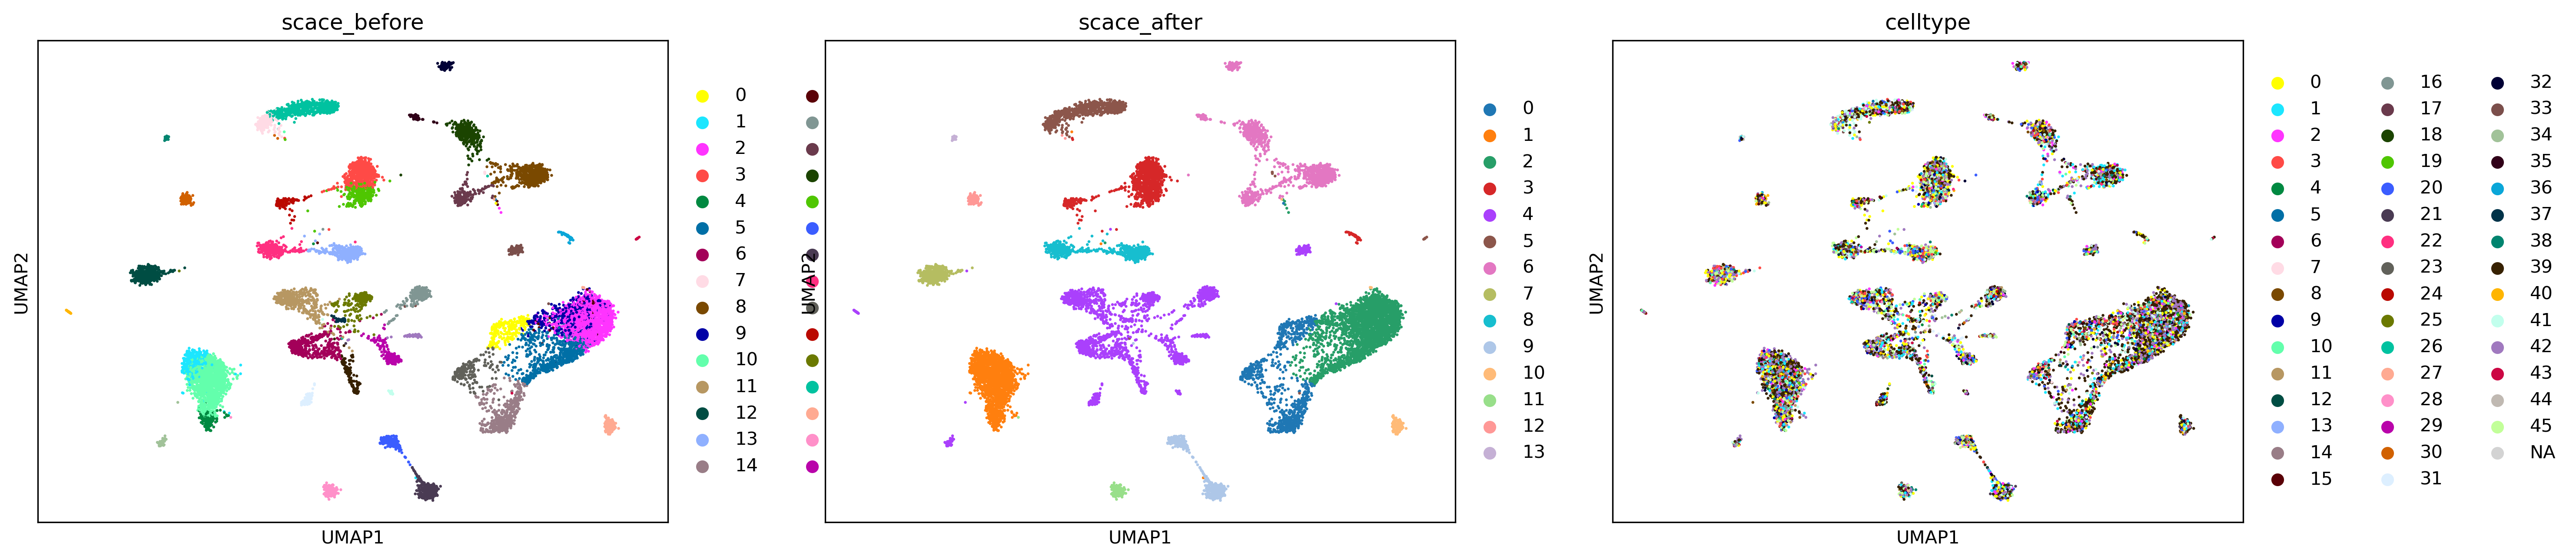

In [11]:
sc.pp.neighbors(adata_tmp)
sc.tl.umap(adata_tmp)
sc.pl.umap(adata_tmp, color=['scace_before', 'scace_after', 'celltype'])

For the final time

In [12]:
adata_tmp = sc.AnnData(emb_all[-2])
adata_tmp.obs['celltype'] = adata.obs['celltype']
adata_tmp.obs['scace_before'], adata_tmp.obs['scace_after'] = pred_all[2][0], pred_all[2][-1]
adata_tmp.obs['scace_before'] = adata_tmp.obs['scace_before'].astype(int).astype('category')
adata_tmp.obs['scace_after'] = adata_tmp.obs['scace_after'].astype(int).astype('category')

/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


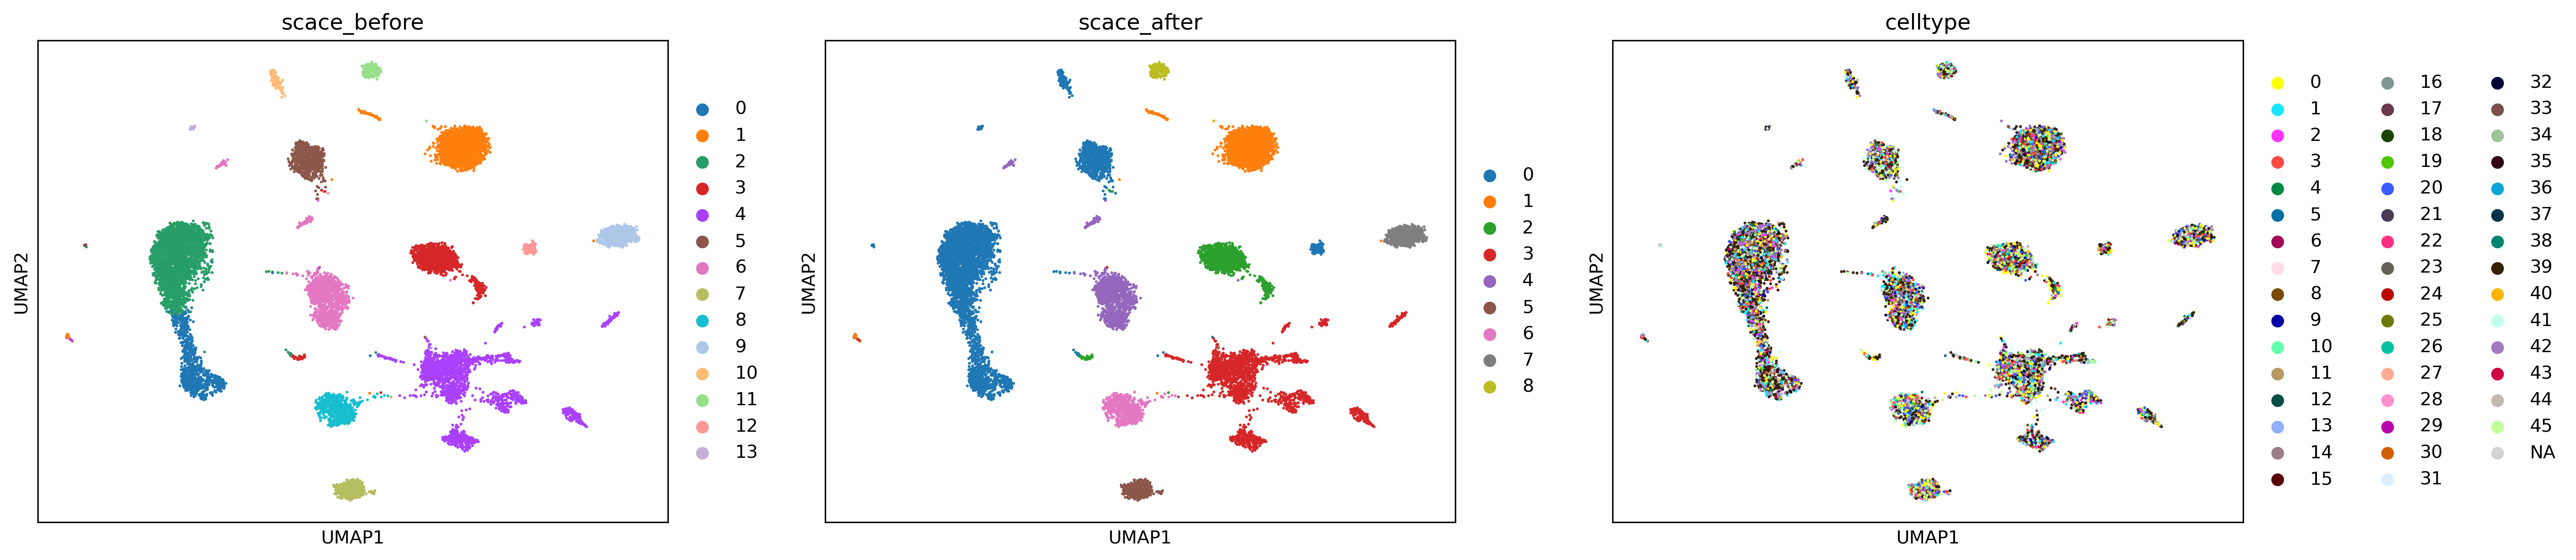

In [13]:
sc.pp.neighbors(adata_tmp)
sc.tl.umap(adata_tmp)
sc.pl.umap(adata_tmp, color=['scace_before', 'scace_after', 'celltype'])